In [236]:
import pandas as pd
import numpy as np

# Customer Service Requests Analysis
Project 1 

DESCRIPTION

Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

Problem Objective :

    Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
    Domain: Customer Service

    Analysis Tasks to be performed:

    (Perform a service request data analysis of New York City 311 calls) 

    Import a 311 NYC service request.

    Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

    Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

    Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [237]:
df1=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df1.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [238]:
df1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [239]:
df1.shape

(300698, 53)

In [240]:
df1.nunique()

Unique Key                        300698
Created Date                      259493
Closed Date                       237165
Agency                                 1
Agency Name                            3
Complaint Type                        24
Descriptor                            45
Location Type                         18
Incident Zip                         201
Incident Address                  107652
Street Name                         7320
Cross Street 1                      5982
Cross Street 2                      5823
Intersection Street 1               4413
Intersection Street 2               4172
Address Type                           5
City                                  53
Landmark                             116
Facility Type                          1
Status                                 4
Due Date                          259851
Resolution Description                18
Resolution Action Updated Date    237895
Community Board                       75
Borough         

In [241]:
import datetime

df1['Created Date'] = pd.to_datetime(df1['Created Date'])
df1['Closed Date'] = pd.to_datetime(df1['Closed Date'])

In [242]:
# df_re=df1['Created Date','Closed Date','Agency','Agency Name','Complaint Type','Descriptor','Location Type','Incident Zip',
#          'Address Type','City','Status','Due Date','Resolution Description']

In [243]:
df1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [244]:
# from datetime import datetime
# start_date=df1['Created Date']
# start_dt = datetime.strptime(start_date, "%d-%m-%Y %H:%M:%S") # convert into datetime fromat
# value['start_time'] = datetime.strftime(start_dt, "%H:%M:%S")

In [245]:
df1.isnull().sum(axis = 0)

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [246]:
df1['Complaint Type'].unique()


array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [247]:
import matplotlib.pyplot as plt
%matplotlib inline

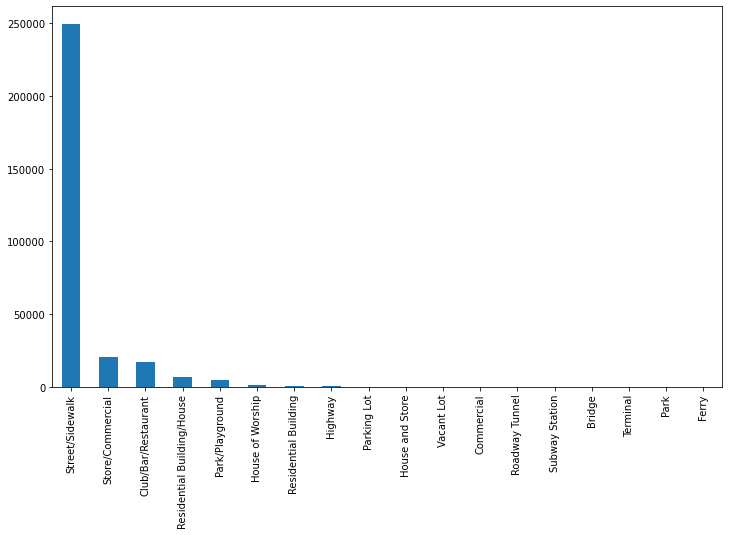

In [248]:
plt.figure(figsize=(12,7))
df1['Location Type'].value_counts().plot(kind='bar')
plt.show()

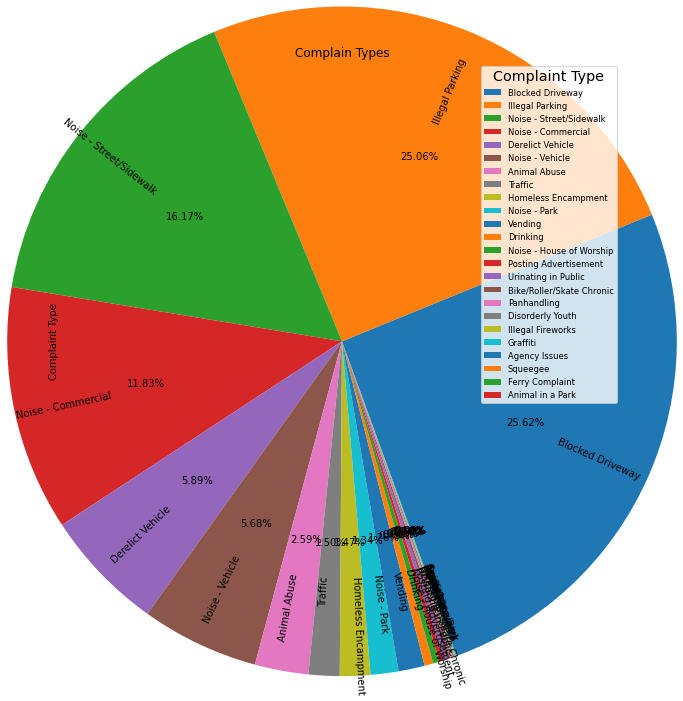

In [249]:
plt.figure(figsize=(10,20))
df1['Complaint Type'].value_counts().plot(kind='pie',startangle=-70,rotatelabels=45,
                                            autopct='%.2f%%',radius=1.5,labeldistance=.7)
# plt.pie(,autopct='%.2f%%')
plt.legend(loc='upper right',fontsize ='small',title='Complaint Type',title_fontsize='x-large')
plt.title('Complain Types')
plt.show()

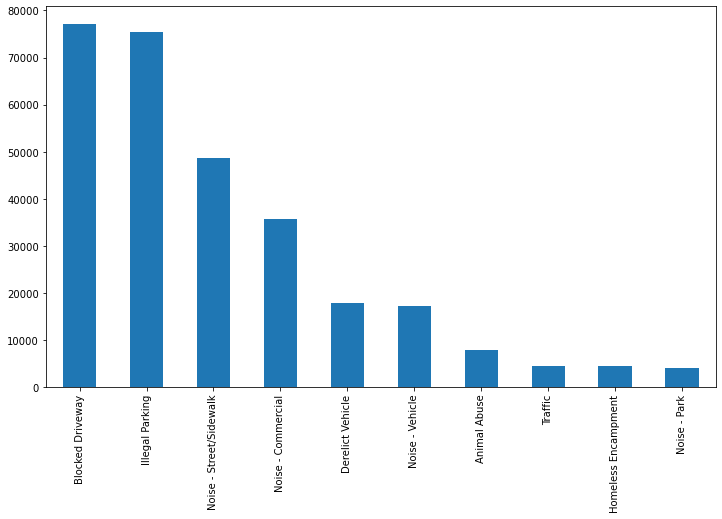

In [250]:
plt.figure(figsize=(12,7))
df1['Complaint Type'].value_counts()[:10].plot(kind='bar')
# for p in ax.patches: 
#     ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

plt.show()

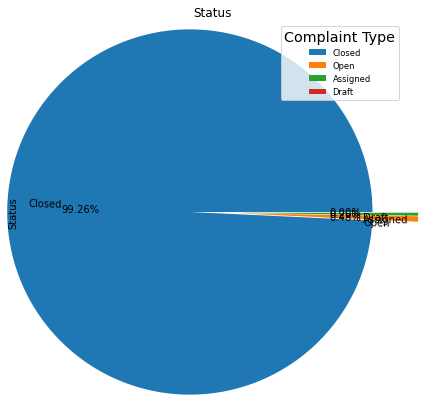

In [251]:
plt.figure(figsize=(7,7))
df1['Status'].value_counts().plot(kind='pie',startangle=0,rotatelabels=45,explode=[0.15]*4,
                                            autopct='%.2f%%',radius=1.2,labeldistance=.7)
# plt.pie(,autopct='%.2f%%')
plt.legend(loc='upper right',fontsize ='small',title='Complaint Type',title_fontsize='x-large')
plt.title('Status')
plt.show()

In [252]:
complaint_df=df1['Complaint Type'].value_counts()
print(complaint_df)

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64


In [253]:
df1['Created_weekday']=df1['Created Date'].apply(lambda x: x.strftime('%A'))

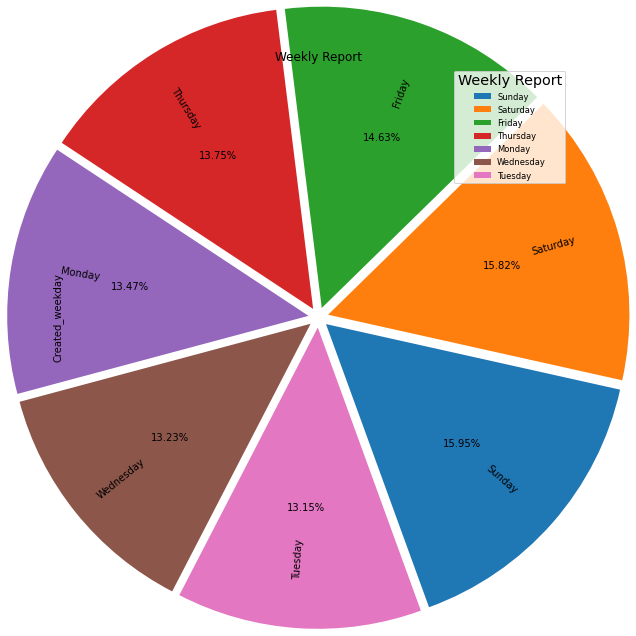

In [254]:
plt.figure(figsize=(9,19))
df1['Created_weekday'].value_counts().plot(kind='pie',startangle=-70,rotatelabels=45,explode=[0.05]*7,
                                            autopct='%.2f%%',radius=1.5,labeldistance=.7)

plt.legend(loc='upper right',fontsize ='small',title='Weekly Report',title_fontsize='x-large')
plt.title('Weekly Report')
# plt.pie(,autopct='%.2f%%')
plt.show()

In [255]:
df1["Request_Closing_Time"]=(df1["Closed Date"]-df1["Created Date"])

Request_Closing_Time=[]
for x in (df1["Closed Date"]-df1["Created Date"]):
    close=x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df1["Request_Closing_Time"]=Request_Closing_Time

<IPython.core.display.Javascript object>

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


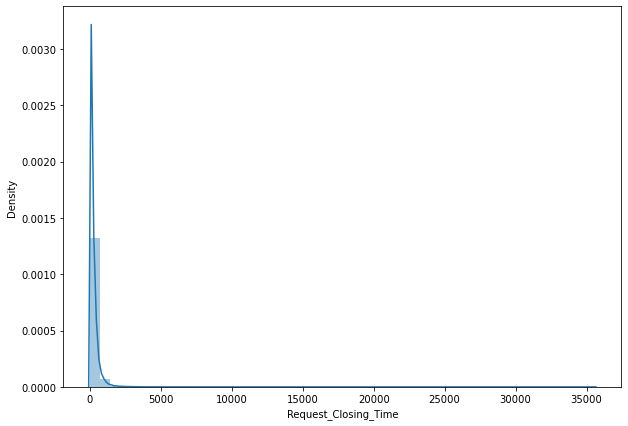

In [256]:
#Univariate Distribution Plot for Request Closing Time
plt.figure(figsize=(10,7))
sns.distplot(df1["Request_Closing_Time"])
plt.show()

<IPython.core.display.Javascript object>

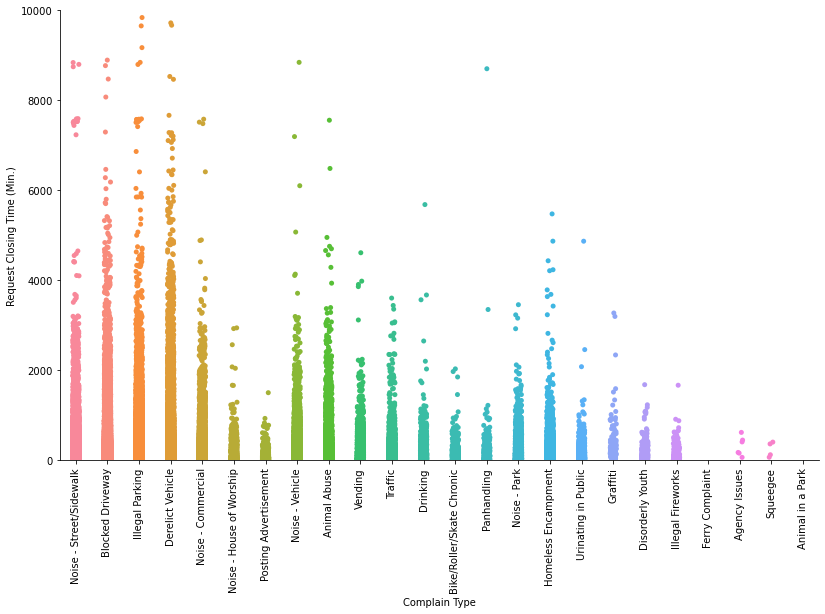

In [257]:
g=sns.catplot(x='Complaint Type', y="Request_Closing_Time",data=df1)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,10000))
g.set(xlabel='Complain Type', ylabel='Request Closing Time (Min.)')
plt.show()

In [258]:
df_ct=df1[['Complaint Type','Request_Closing_Time']]
df_ct.isnull().sum(axis = 0)

Complaint Type             0
Request_Closing_Time    2164
dtype: int64

In [259]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Complaint Type        300698 non-null  object 
 1   Request_Closing_Time  298534 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


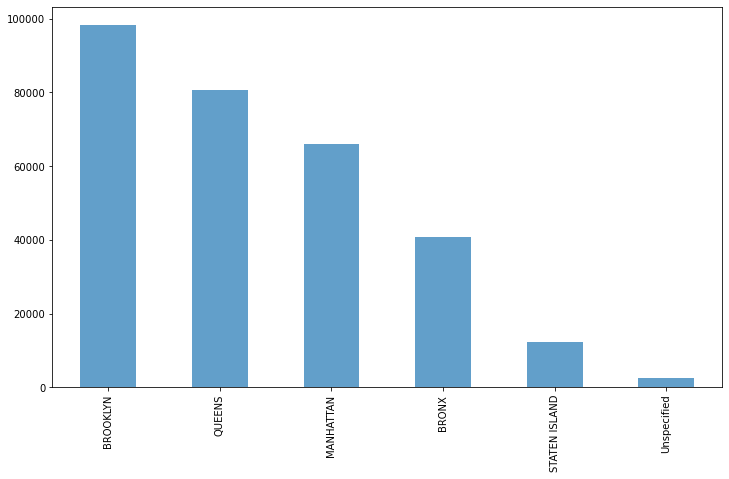

In [260]:
plt.figure(figsize=(12,7))
df1['Borough'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

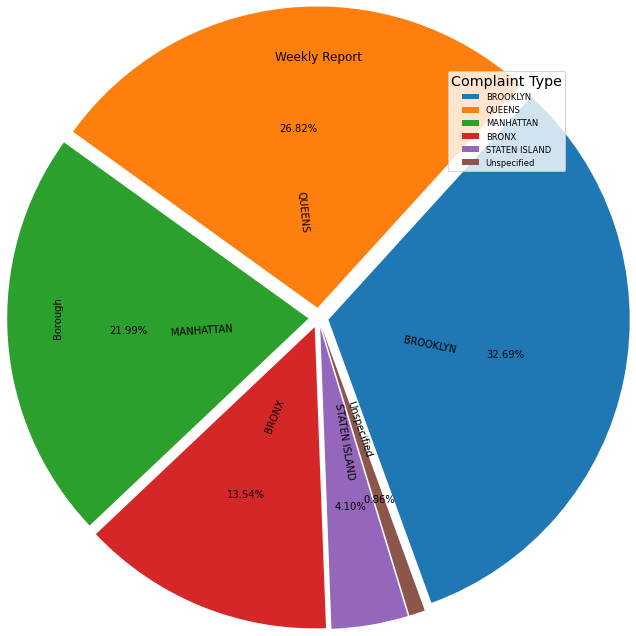

In [261]:
plt.figure(figsize=(9,19))
df1['Borough'].value_counts().plot(kind='pie',startangle=-70,rotatelabels=45,explode=[0.05]*6,
                                            autopct='%.2f%%',radius=1.5,labeldistance=.25)

plt.legend(loc='upper right',fontsize ='small',title='Complaint Type',title_fontsize='x-large')
plt.title('Weekly Report')
# plt.pie(,autopct='%.2f%%')
plt.show()

In [262]:
#Request Closing Time for all location Type sorted in ascending Order
df_closing_time=pd.DataFrame(df1.groupby("Location Type")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")

In [263]:
df_closing_time

,Request_Closing_Time
Location Type,
Subway Station,142.250980
Club/Bar/Restaurant,186.074330
House of Worship,191.833279
Store/Commercial,198.089073
Park/Playground,207.137129
Highway,223.424221
Bridge,229.158333
Roadway Tunnel,266.525714
Street/Sidewalk,268.515306


In [264]:
#Request Closing Time for all location Type sorted in ascending Order
df_request_time_city=pd.DataFrame(df1.groupby("City")["Request_Closing_Time"].mean()).sort_values("Request_Closing_Time")
df_request_time_city

,Request_Closing_Time
City,
ARVERNE,135.895606
ROCKAWAY PARK,139.133736
LITTLE NECK,154.660316
OAKLAND GARDENS,157.853146
BAYSIDE,160.759992
FAR ROCKAWAY,167.399774
NEW YORK,178.357371
FLUSHING,181.081826
FOREST HILLS,193.449032


In [265]:
#Percentage Of Missing Value
pd.DataFrame((df1.isnull().sum()/df1.shape[0]*100)).sort_values(0,ascending=False)[:20]


,0
School or Citywide Complaint,100.000000
Vehicle Type,100.000000
Garage Lot Name,100.000000
Taxi Company Borough,100.000000
Taxi Pick Up Location,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


In [266]:
#Remove the column with very high percentage of missing value
new_df=df1.loc[:,(df1.isnull().sum()/df1.shape[0]*100)<=50]

In [267]:
print("Old DataFrame Shape :",df1.shape)
print("New DataFrame Shape : ",new_df.shape)

Old DataFrame Shape : (300698, 55)
New DataFrame Shape :  (300698, 41)


In [268]:
rem=[]
for x in new_df.columns.tolist():
    if new_df[x].nunique()<=3:
        print(x+ " "*10+" : ",new_df[x].unique())
        rem.append(x)

Agency           :  ['NYPD']
Agency Name           :  ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type           :  ['Precinct' nan]
Park Facility Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Name           :  ['Unspecified' 'Alley Pond Park - Nature Center']
School Number           :  ['Unspecified' 'Q001']
School Region           :  ['Unspecified' nan]
School Code           :  ['Unspecified' nan]
School Phone Number           :  ['Unspecified' '7182176034']
School Address           :  ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City           :  ['Unspecified' 'QUEENS']
School State           :  ['Unspecified' 'NY']
School Zip           :  ['Unspecified' nan]
School Not Found           :  ['N']


In [269]:
new_df.drop(rem,axis=1,inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [270]:
new_df.shape

(300698, 27)

In [271]:
#Remove columns that are not needed for our analysis
rem1=["Unique Key","Incident Address","Descriptor","Street Name","Cross Street 1","Cross Street 2","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"]

new_df.drop(rem1,axis=1,inplace=True)

In [272]:
new_df.shape

(300698, 11)

In [273]:
new_df.head()

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Address Type,City,Status,Borough,Created_weekday,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,Closed,MANHATTAN,Thursday,55.250000
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,Closed,QUEENS,Thursday,86.266667
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,10458.0,ADDRESS,BRONX,Closed,BRONX,Thursday,291.516667
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,Closed,BRONX,Thursday,465.233333
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,Closed,QUEENS,Thursday,207.033333


<IPython.core.display.Javascript object>

(0.0, 2000.0)

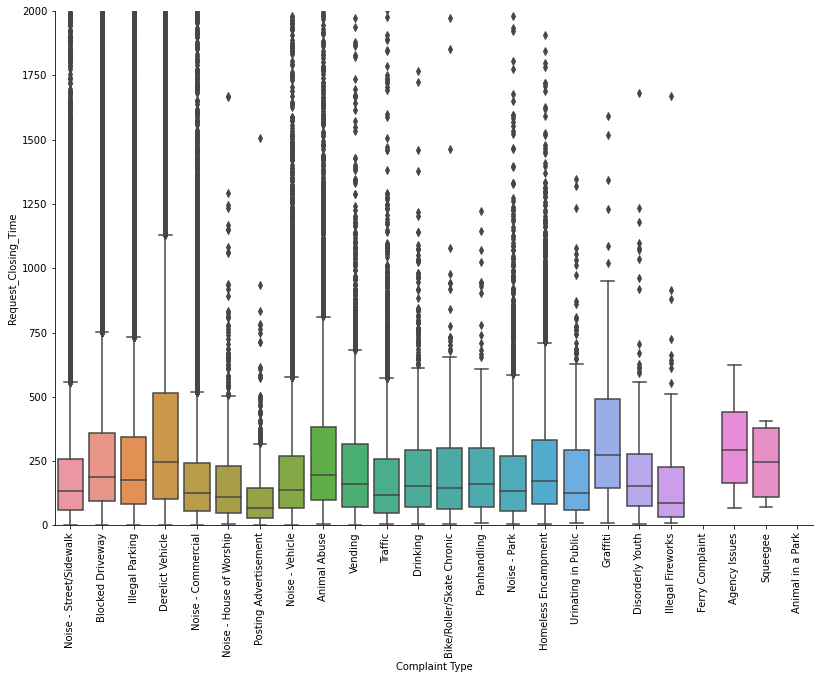

In [274]:
g=sns.catplot(x="Complaint Type",y="Request_Closing_Time",kind="box",data=new_df)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.xticks(rotation=90)
plt.ylim((0,2000))

In [275]:
import statsmodels.api as sm

H0:Complaint Type and Location Type are independent

H1:Complaint Type and Location Type are related

In [276]:
chi_sq=pd.DataFrame()
chi_sq["Location Type"]=new_df["Location Type"]
chi_sq["Complaint Type"]=new_df["Complaint Type"]

chi_sq.dropna(inplace=True)

In [277]:
data_crosstab = pd.crosstab( chi_sq["Location Type"],chi_sq["Complaint Type"])
data_crosstab

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location Type,,,,,,,,,,,,,,,,,,,,,
Bridge,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Club/Bar/Restaurant,0,0,0,0,0,0,366,0,0,0,...,0,0,0,0,0,0,0,0,21,0
Commercial,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ferry,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Highway,0,0,0,0,14,0,0,0,0,15,...,0,0,0,0,0,0,0,186,0,0
House and Store,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
House of Worship,0,0,0,0,0,0,0,0,0,0,...,929,0,0,0,0,0,0,0,0,0
Park,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Park/Playground,123,0,0,0,0,0,98,0,0,353,...,0,4041,0,0,6,0,0,0,38,106


In [278]:
import scipy.stats

In [279]:
stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab) 

alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


H0:  there is no significant different in mean of Request_Closing_Time for different Complaint

H1: there is signficant different in mean of Request_Closing_Time for different Complaint

In [280]:
anova_df=pd.DataFrame()
anova_df["Request_Closing_Time"]=new_df["Request_Closing_Time"]
anova_df["Complaint"]=new_df["Complaint Type"]

anova_df.dropna(inplace=True)
anova_df.head()

,Request_Closing_Time,Complaint
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [281]:
anova_df['Col1'] = pd.factorize(anova_df.Complaint)[0] + 1
anova_df.head()

,Request_Closing_Time,Complaint,Col1
0,55.250000,Noise - Street/Sidewalk,1
1,86.266667,Blocked Driveway,2
2,291.516667,Blocked Driveway,2
3,465.233333,Illegal Parking,3
4,207.033333,Illegal Parking,3


In [282]:
anova_df.head()

,Request_Closing_Time,Complaint,Col1
0,55.250000,Noise - Street/Sidewalk,1
1,86.266667,Blocked Driveway,2
2,291.516667,Blocked Driveway,2
3,465.233333,Illegal Parking,3
4,207.033333,Illegal Parking,3


In [283]:
X=anova_df["Request_Closing_Time"]
Y=anova_df["Col1"]
lm=sm.OLS(Y, X).fit()
# lm=sm.OLS("Col1~Request_Closing_Time",data=anova_df).fit()


In [284]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Col1   R-squared (uncentered):                   0.188
Model:                            OLS   Adj. R-squared (uncentered):              0.188
Method:                 Least Squares   F-statistic:                          6.889e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                        0.00
Time:                        15:46:23   Log-Likelihood:                     -8.7638e+05
No. Observations:              298534   AIC:                                  1.753e+06
Df Residuals:                  298533   BIC:                                  1.753e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Request_Closing_Time     0.0049   1.86e-05    262.478      0.000       0.005       0.005
==============================================================================
Omnibus:                    96741.709   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25660090.794
Skew:                          -0.122   Prob(JB):                         0.00
Kurtosis:                      48.418   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""